In [ ]:
#Importing necessary libraries:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

#calculating MSE
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error



from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor



from sklearn.model_selection import GridSearchCV


In [ ]:
#Loading the dataset
Bike_sharing_df = pd.read_csv("/content/Group_8_clean_data.csv")

In [ ]:
#Dropping the unnecsessary columns
Bike_sharing_df= Bike_sharing_df.drop("Unnamed: 0",axis=1)
Bike_sharing_df=Bike_sharing_df.drop("total riders",axis=1)

CHanging categorical variable(s) into dummy/indicator variables.

In [ ]:
seasons = pd.get_dummies(Bike_sharing_df['season'], drop_first=True)
seasons


,spring,summer,winter
0,0,0,1
1,0,0,1
2,0,0,1
3,0,0,1
4,0,0,1
...,...,...,...
17372,0,0,1
17373,0,0,1
17374,0,0,1
17375,0,0,1


In [ ]:
weekday = pd.get_dummies(Bike_sharing_df['weekday'], drop_first=True)

weekday

,monday,saturday,sunday,thursday,tuesday,wednessday
0,0,1,0,0,0,0
1,0,1,0,0,0,0
2,0,1,0,0,0,0
3,0,1,0,0,0,0
4,0,1,0,0,0,0
...,...,...,...,...,...,...
17372,1,0,0,0,0,0
17373,1,0,0,0,0,0
17374,1,0,0,0,0,0
17375,1,0,0,0,0,0


In [ ]:
month = pd.get_dummies(Bike_sharing_df['month'], drop_first=True)
month

,aug,dec,feb,jan,jul,jun,mar,may,nov,oct,sep
0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
17372,0,1,0,0,0,0,0,0,0,0,0
17373,0,1,0,0,0,0,0,0,0,0,0
17374,0,1,0,0,0,0,0,0,0,0,0
17375,0,1,0,0,0,0,0,0,0,0,0


In [ ]:
workingday =  pd.get_dummies(Bike_sharing_df['workingday'], drop_first=True)
workingday

,WorkingDay
0,0
1,0
2,0
3,0
4,0
...,...
17372,1
17373,1
17374,1
17375,1


In [ ]:
Bike_sharing_df['year'] = Bike_sharing_df['year'].map({2011 : 0 , 2012:1})


In [ ]:
bike_sharing_df= pd.concat([Bike_sharing_df,seasons,weekday,month],axis=1)
bike_sharing_df

,season,year,month,hour,holiday,weekday,workingday,weathersit,temp,atemp,...,dec,feb,jan,jul,jun,mar,may,nov,oct,sep
0,winter,0,jan,0,0,saturday,Holiday,1,0.24,0.2879,...,0,0,1,0,0,0,0,0,0,0
1,winter,0,jan,1,0,saturday,Holiday,1,0.22,0.2727,...,0,0,1,0,0,0,0,0,0,0
2,winter,0,jan,2,0,saturday,Holiday,1,0.22,0.2727,...,0,0,1,0,0,0,0,0,0,0
3,winter,0,jan,3,0,saturday,Holiday,1,0.24,0.2879,...,0,0,1,0,0,0,0,0,0,0
4,winter,0,jan,4,0,saturday,Holiday,1,0.24,0.2879,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17372,winter,1,dec,19,0,monday,WorkingDay,2,0.26,0.2576,...,1,0,0,0,0,0,0,0,0,0
17373,winter,1,dec,20,0,monday,WorkingDay,2,0.26,0.2576,...,1,0,0,0,0,0,0,0,0,0
17374,winter,1,dec,21,0,monday,WorkingDay,1,0.26,0.2576,...,1,0,0,0,0,0,0,0,0,0
17375,winter,1,dec,22,0,monday,WorkingDay,1,0.26,0.2727,...,1,0,0,0,0,0,0,0,0,0


In [ ]:
bike_sharing_df=bike_sharing_df.drop("season",axis=1)
bike_sharing_df=bike_sharing_df.drop("month",axis=1)
bike_sharing_df=bike_sharing_df.drop( "weekday",axis=1)
bike_sharing_df=bike_sharing_df.drop("workingday",axis=1)

In [ ]:
#our dataset
bike_sharing_df

,year,hour,holiday,weathersit,temp,atemp,humidity,windspeed,casual,registered,...,dec,feb,jan,jul,jun,mar,may,nov,oct,sep
0,0,0,0,1,0.24,0.2879,0.81,0.0000,3,13,...,0,0,1,0,0,0,0,0,0,0
1,0,1,0,1,0.22,0.2727,0.80,0.0000,8,32,...,0,0,1,0,0,0,0,0,0,0
2,0,2,0,1,0.22,0.2727,0.80,0.0000,5,27,...,0,0,1,0,0,0,0,0,0,0
3,0,3,0,1,0.24,0.2879,0.75,0.0000,3,10,...,0,0,1,0,0,0,0,0,0,0
4,0,4,0,1,0.24,0.2879,0.75,0.0000,0,1,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17372,1,19,0,2,0.26,0.2576,0.60,0.1642,11,108,...,1,0,0,0,0,0,0,0,0,0
17373,1,20,0,2,0.26,0.2576,0.60,0.1642,8,81,...,1,0,0,0,0,0,0,0,0,0
17374,1,21,0,1,0.26,0.2576,0.60,0.1642,7,83,...,1,0,0,0,0,0,0,0,0,0
17375,1,22,0,1,0.26,0.2727,0.56,0.1343,13,48,...,1,0,0,0,0,0,0,0,0,0


# Using the features obtained from selection performed uisng KNN in step 2

In [ ]:
y = bike_sharing_df['Count']

# Assigning features (X)
#x = bike_sharing_df.drop('Count', axis=1)
x=bike_sharing_df[['casual','registered','year', 'hour', 'temp', 'atemp', 'humidity',
       'summer', 'winter', 'jan']]

In [ ]:
#splitting the data
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [ ]:
# Convert feature names to strings for both X_train and X_test
X_train.columns = X_train.columns.astype(str)
X_test.columns = X_test.columns.astype(str)

In [ ]:
#Scaling of Data Using StandardScaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Y_train_scaled = scaler.fit_transform(Y_train.values.reshape(-1, 1))
Y_test_scaled = scaler.fit_transform(Y_test.values.reshape(-1,1))


**XG BOOST**

*   XGBoost(extreme Gradiant Boosting) is an optimized implementation of the gradient boosting algorithum, this model has proven sucess compared to other algorithums in machine learning.

*  


reference links,

https://youtu.be/aLOQD66Sj0g?si=8XM3M2hUCm_jHBMv

https://xgboost.readthedocs.io/en/stable/python/python_intro.html



In [ ]:
import xgboost as xgb
xg_reg = xgb.XGBRegressor(objective ='reg:squarederror')

# Fit the model to the training data
xg_reg.fit(X_train_scaled, Y_train_scaled)

# Predict on the test data
y_pred = xg_reg.predict(X_test_scaled)

# Evaluate the model
mse_before_tuning_XGB= mean_squared_error(Y_test_scaled, y_pred)
print(f'Mean Squared Error Before tuning : {mse_before_tuning_XGB}')

Mean Squared Error Before tuning : 0.0031750372699472147


The Mean squared errorobtained for XG boost is 0.00317.

# Applying Hyperparameter tuning for XG BOOST

In [ ]:
grid_search = GridSearchCV(xgb.XGBRegressor(random_state=42), param_grid={'learning_rate': [0.01, 0.1, 0.2], 'n_estimators': [100,200,300], 'max_depth': [3,4,5]}, scoring='neg_mean_squared_error', cv=5)
grid_search.fit(X_train_scaled, Y_train_scaled)
best_xgb_after_tuning = grid_search.best_estimator_
y_pred_after_tuning = best_xgb_after_tuning.predict(X_test_scaled)
mse_after_tuning_XGB = mean_squared_error(Y_test_scaled, y_pred_after_tuning )
print('Best Hyperparameters obtained are',grid_search.best_params_)
print('MSE after tuning is ',mse_after_tuning_XGB)

Best Hyperparameters obtained are {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 300}
MSE after tuning is  0.0031321174461106356


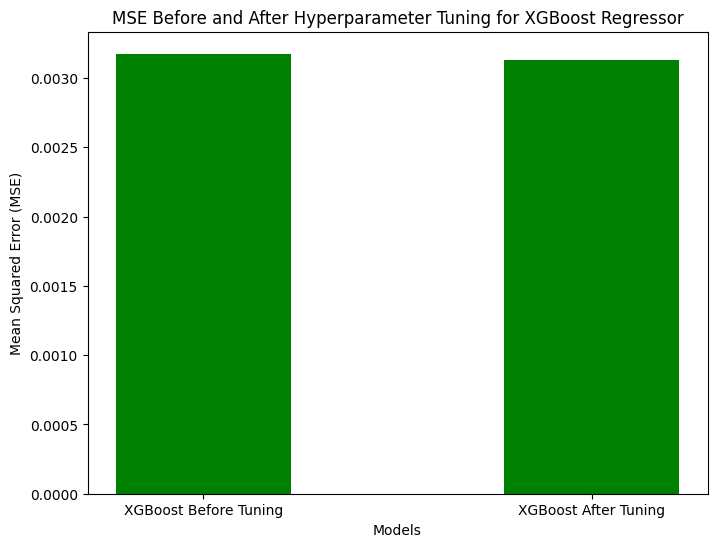

In [ ]:
# Bar plot
models_names = ['XGBoost Before Tuning', 'XGBoost After Tuning']

plt.figure(figsize=(8, 6))
bar_width = 0.45
index = np.arange(len(models_names))

plt.bar(index, [mse_before_tuning_XGB, mse_after_tuning_XGB], width=bar_width, color='GREEN')

plt.xlabel('Models')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('MSE Before and After Hyperparameter Tuning for XGBoost Regressor')
plt.xticks(index, models_names)
plt.show()

# **Observation:**

The best hyperparameters obtained after tuning the model are {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 300}. The Mean Squared Error (MSE) after tuning is 0.00313, showcasing a slight improvement from the initial MSE before tuning, which was 0.00318.

# **ADA BOOST Regressor**



1.   AdaBoost is an ensemble learning technique implemented in this code using DecisionTreeRegressor as the base estimator. This adaptive boosting technique proves valuable in capturing complex patterns and improving overall classification performance for bike-sharing usage patterns.



2.   adaBoostRegressor is used to generate a strong ensemble model for regression problems by combining the predictive power of several decision tree regressors, each of which repeatedly corrects the errors of its predecessors.





3. With 50 boosting rounds and a learning rate of 0.1, are applied here and  AdaBoost combines multiple weak learners to build a strong regression model.



In [ ]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor



In [ ]:
base_regressor = DecisionTreeRegressor(max_depth=3)

adaboost_reg = AdaBoostRegressor(
    base_estimator=base_regressor,
    n_estimators=50,  # Number of boosting rounds
    learning_rate=0.1  # Contribution of each weak learner
)
adaboost_reg.fit(X_train_scaled, Y_train_scaled)

y_pred = adaboost_reg.predict(X_test_scaled)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


In [ ]:
# Evaluate the model
mse_before_tuning_ADA = mean_squared_error(Y_test_scaled, y_pred)
print(f"Mean Squared Error before tuning is : {mse_before_tuning_ADA}")


Mean Squared Error before tuning is : 0.02686976408219419


The mean squared error obtained before tuning ADA Boost is 0.02686

In [ ]:
param_grid = {
    'n_estimators': [50, 100, 150],      # Number of boosting rounds
    'learning_rate': [0.01, 0.1, 0.2]   # Contribution of each weak learner
}

# Create a GridSearchCV object
grid_search = GridSearchCV(estimator=adaboost_reg, param_grid=param_grid, scoring='neg_mean_squared_error', cv=5)

# Fit the model to the training data
grid_search.fit(X_train_scaled, Y_train_scaled)

# Get the best hyperparameters
best_params = grid_search.best_params_

# Train the AdaBoostRegressor with the best hyperparameters
best_adaboost_reg = grid_search.best_estimator_

# Make predictions on the test set
y_pred = best_adaboost_reg.predict(X_test_scaled)



/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarnin

In [ ]:
# Calculate Mean Squared Error
mse_after_tuning_ADA= mean_squared_error(Y_test_scaled, y_pred)

# Print the best hyperparameters and MSE
print("Best Hyperparameters:", best_params)
print("Mean Squared Error on Test Set:", mse_after_tuning_ADA)

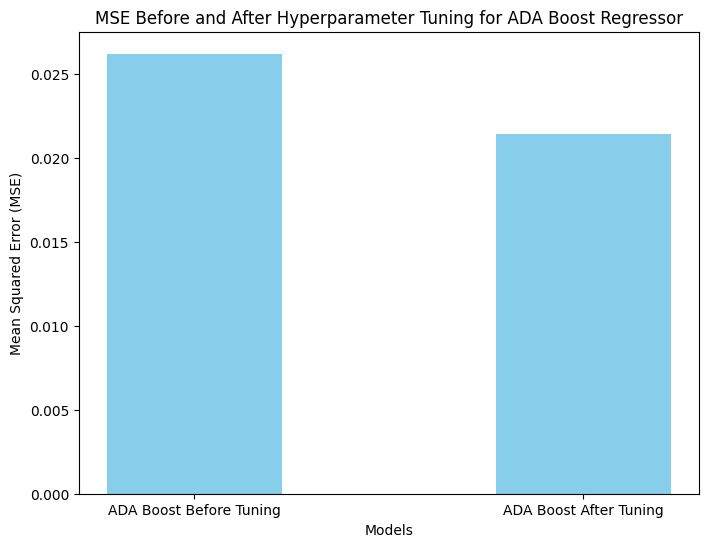

In [ ]:
# Bar plot
models_names = ['ADA Boost Before Tuning', 'ADA Boost After Tuning']

plt.figure(figsize=(8, 6))
bar_width = 0.45
index = np.arange(len(models_names))

plt.bar(index, [mse_before_tuning_ADA, mse_after_tuning_ADA], width=bar_width, color='skyblue')

plt.xlabel('Models')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('MSE Before and After Hyperparameter Tuning for ADA Boost Regressor')
plt.xticks(index, models_names)
plt.show()

# Observation:


The mean squared error (MSE) before tuning ADA Boost was 0.02601. After hyperparameter tuning, the best configuration {'learning_rate': 0.2, 'n_estimators': 150} resulted in a reduced MSE on the test set, measuring 0.0214. This indicates that the optimization process has led to an improvement in the model's predictive performance

# **Neural Netwrok with single layer**








In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [ ]:

#Build the deep learning model
model = Sequential()
#First hidden layer with 32 neurons
model.add(Dense(32, activation='relu'))
#Output layer with 1 neuron (for regression)
model.add(Dense(1, activation='linear'))

# Compile the model
optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer,metrics=['mean_absolute_error'], loss='mean_squared_error')

#Train the model with 10 epochs
model.fit(X_train_scaled, Y_train_scaled, epochs=10, batch_size=32, validation_data=(X_test_scaled, Y_test_scaled), verbose=2)


model.summary()



Epoch 1/10
435/435 - 8s - loss: 0.2044 - mean_absolute_error: 0.2495 - val_loss: 0.0195 - val_mean_absolute_error: 0.1025 - 8s/epoch - 19ms/step
Epoch 2/10
435/435 - 2s - loss: 0.0098 - mean_absolute_error: 0.0751 - val_loss: 0.0089 - val_mean_absolute_error: 0.0694 - 2s/epoch - 4ms/step
Epoch 3/10
435/435 - 1s - loss: 0.0045 - mean_absolute_error: 0.0515 - val_loss: 0.0069 - val_mean_absolute_error: 0.0605 - 1s/epoch - 3ms/step
Epoch 4/10
435/435 - 2s - loss: 0.0029 - mean_absolute_error: 0.0415 - val_loss: 0.0054 - val_mean_absolute_error: 0.0526 - 2s/epoch - 4ms/step
Epoch 5/10
435/435 - 2s - loss: 0.0021 - mean_absolute_error: 0.0355 - val_loss: 0.0049 - val_mean_absolute_error: 0.0511 - 2s/epoch - 4ms/step
Epoch 6/10
435/435 - 2s - loss: 0.0016 - mean_absolute_error: 0.0310 - val_loss: 0.0042 - val_mean_absolute_error: 0.0470 - 2s/epoch - 4ms/step
Epoch 7/10
435/435 - 2s - loss: 0.0013 - mean_absolute_error: 0.0274 - val_loss: 0.0037 - val_mean_absolute_error: 0.0438 - 2s/epoch - 

In [ ]:
#Evaluate the model on the test set
y_pred = model.predict(X_test_scaled)
y_pred_train = model.predict(X_train_scaled)
mse_test= mean_squared_error(Y_test_scaled, y_pred)
mae_test=mean_absolute_error(Y_test_scaled,y_pred)


print("Mean Squared Error on Test Set:", mse_test)
print("Mean Absolute Error on Test data:",mae_test)



mse_train=mean_squared_error(Y_train_scaled,y_pred_train)
mae_train=mean_absolute_error(Y_train_scaled,y_pred_train)



print("\n Mean Squared Error on Train data:", mse_train)
print("Mean Absolute Error on Train data:",mae_train)




435/435 [==============================] - 1s 3ms/step
Mean Squared Error on Test Set: 0.003632639521411432
Mean Absolute Error on Test data: 0.04371347813726185

 Mean Squared Error on Train data: 0.000691444007507365
Mean Absolute Error on Train data: 0.019991407852279017


**Observation:**

The Mean Sqquared error obtained on test data with single layer is 0.00363.The Mean Sqaured error obtained on train data with single layer is 0.000691

# **Deep Learning model with two layers**

1.  The deep learning model probably includes an input layer to receive data, a hidden layer to capture nuanced patterns, and an output layer for predicting bike rental counts. By training on features such as weather, time, and historical usage patterns, the model gains the ability to understand intricate relationships, resulting in precise predictions for bike sharing demand.


2.  Customization of the model's capacity, achieved through adjustments to layer sizes and activation functions, further enhances its ability to capture complex patterns within the dataset.






In [ ]:
# Build the deep learning model
model1 = Sequential()
model1.add(Dense(32, activation='relu'))
 # First hidden layer with 32 neurons
model1.add( Dense(16, activation='relu')),
model1.add(Dense(1, activation='linear'))  # Output layer with 1 neuron (for regression)

# Compile the model
optimizer = Adam(learning_rate=0.001)
model1.compile(optimizer='adam',metrics=['mean_absolute_error'], loss='mean_squared_error')



# Train the model
model1.fit(X_train_scaled, Y_train_scaled, epochs=10, batch_size=32, validation_data=(X_test_scaled, Y_test_scaled), verbose=2)

model1.summary()




Epoch 1/10
435/435 - 4s - loss: 0.1056 - mean_absolute_error: 0.1684 - val_loss: 0.0108 - val_mean_absolute_error: 0.0777 - 4s/epoch - 9ms/step
Epoch 2/10
435/435 - 1s - loss: 0.0047 - mean_absolute_error: 0.0516 - val_loss: 0.0058 - val_mean_absolute_error: 0.0563 - 1s/epoch - 3ms/step
Epoch 3/10
435/435 - 1s - loss: 0.0027 - mean_absolute_error: 0.0393 - val_loss: 0.0048 - val_mean_absolute_error: 0.0513 - 1s/epoch - 3ms/step
Epoch 4/10
435/435 - 1s - loss: 0.0018 - mean_absolute_error: 0.0324 - val_loss: 0.0039 - val_mean_absolute_error: 0.0462 - 1s/epoch - 3ms/step
Epoch 5/10
435/435 - 1s - loss: 0.0013 - mean_absolute_error: 0.0280 - val_loss: 0.0036 - val_mean_absolute_error: 0.0440 - 1s/epoch - 3ms/step
Epoch 6/10
435/435 - 1s - loss: 0.0011 - mean_absolute_error: 0.0248 - val_loss: 0.0050 - val_mean_absolute_error: 0.0512 - 1s/epoch - 3ms/step
Epoch 7/10
435/435 - 2s - loss: 8.4884e-04 - mean_absolute_error: 0.0222 - val_loss: 0.0053 - val_mean_absolute_error: 0.0530 - 2s/epoch

In [ ]:
# Evaluate the model on the test set
y_pred_model1 = model1.predict(X_test_scaled)
y_pred_train_model1 = model.predict(X_train_scaled)
mse_test= mean_squared_error(Y_test_scaled, y_pred_model1)
mae_test=mean_absolute_error(Y_test_scaled,y_pred_model1)


print("Mean Squared Error on Test Set:", mse_test)
print("Mean Absolute Error on Test data:",mae_test)



mse_train=mean_squared_error(Y_train_scaled,y_pred_train_model1)
mae_train=mean_absolute_error(Y_train_scaled,y_pred_train_model1)



print("\n Mean Squared Error on Train data:", mse_train)
print("Mean Absolute Error on Train data:",mae_train)

435/435 [==============================] - 1s 2ms/step
Mean Squared Error on Test Set: 0.002951802125024752
Mean Absolute Error on Test data: 0.03938997964096951

 Mean Squared Error on Train data: 0.000691444007507365
Mean Absolute Error on Train data: 0.019991407852279017


Observation:

The Mean Squared error obatined for neural netwroks with  two layer is 0.003358


The Mean Absolute error obtained for neural networks with two  layer is 0.0004877

# **An Ensemble model containing the top 3 models overall**



1.   Ensemble models are a machine learning approach to combine multiple other models in the prediction process. These models are referred to as base estimators. Ensemble models offer a solution to overcome the technical challenges of building a single estimator.

2.   In this ensemble learning architecture, the inputs are passed to each weak learner while also collecting their predictions. We can use the combined prediction to build a final ensemble model.


The three models applied are Linear regression,decision tree and XG Boost.

References:


https://builtin.com/machine-learning/ensemble-model#

https://towardsdatascience.com/ensemble-methods-comparing-scikit-learns-voting-classifier-to-the-stacking-classifier-f5ab1ed1a29d








**Linear Regression**



In [ ]:
#Linear Regression
#creating linear regression model
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()

lin_reg.fit(X_train_scaled, Y_train_scaled)


#coefficients
print("coefficients: ",lin_reg.coef_)
#intercept
print("intercept:",lin_reg.intercept_)


#predicting on test data
y_pred_linreg=lin_reg.predict(X_test_scaled)
y_pred_linreg




coefficients:  [[ 2.73495954e-01  8.33585767e-01  3.46944695e-16 -5.82867088e-16
  -8.32667268e-16  1.27675648e-15  3.33066907e-16  0.00000000e+00
   5.55111512e-17 -3.05311332e-16]]
intercept: [-1.82064362e-17]


array([[ 0.77836289],
       [ 2.96020051],
       [-0.03094028],
       ...,
       [-0.50667931],
       [ 0.45026701],
       [ 0.5760371 ]])

In [ ]:
# Evaluate
from sklearn import metrics
print("Mean Absolute Error:", metrics.mean_absolute_error(Y_test_scaled, y_pred_linreg))
mae_test_linreg=mean_absolute_error(Y_test_scaled, y_pred_linreg)
print("Mean Squared Error:", metrics.mean_squared_error(Y_test_scaled, y_pred_linreg))
r2_score_linreg=np.sqrt(metrics.mean_squared_error(Y_test_scaled, y_pred_linreg))
print("Root Mean Squared Error:", np.sqrt(metrics.mean_squared_error(Y_test_scaled, y_pred_linreg)))

Mean Absolute Error: 0.036298145692579116
Mean Squared Error: 0.002784355444599404
Root Mean Squared Error: 0.05276699199878086


**Decision Tree**

In [ ]:
#Decision Tree
from sklearn import tree
tree=tree.DecisionTreeRegressor(max_depth=5,
                                min_samples_split=500)
tree.fit(X_train_scaled,Y_train_scaled)

y_pred_dt=tree.predict(X_test_scaled)
y_pred_dt

mse_train_tree= mean_squared_error(Y_train_scaled, tree.predict(X_train_scaled))
mse_test_tree = mean_squared_error(Y_test_scaled, tree.predict(X_test_scaled))
print(mse_train_tree)
print(mse_test_tree)

print("Mean Squared error:", mean_squared_error(Y_test_scaled,y_pred_dt))
mae_test_tree=mean_absolute_error(Y_test_scaled,y_pred_dt)

print("Mean Absolute error:", mae_test_tree)
r2_score_tree=np.sqrt(metrics.mean_squared_error(Y_test_scaled, y_pred_dt))

print("R2 Score:", np.sqrt(metrics.mean_squared_error(Y_test_scaled, y_pred_dt)))

0.022007290285956285
0.025900215246878844
Mean Squared error: 0.025900215246878844
Mean Absolute error: 0.10049112831354585
R2 Score: 0.1609354381324351


**Ensemble Model**

**StackingRegressor:**


StackingRegressor is an ensemble method where several regression models are trained, and their predictions are combined using a meta-regressor. Unlike giving equal importance to each base regressor, stacking incorporates a meta-level model that learns the optimal weights for combining the predictions of the individual models.

**VotingRegressor:**

VotingRegressor, a machine learning ensemble technique, amalgamates predictions from various regression models to produce a conclusive prediction. The aggregation is achieved through either a weighted average or a straightforward majority vote, depending on the chosen combination strategy. This methodology typically enhances model robustness and accuracy by harnessing the varied strengths inherent in different regression algorithms.

In [ ]:
from sklearn.ensemble import VotingRegressor, StackingRegressor
from sklearn.linear_model import LinearRegression


# Hard Voting Regressor
vhard = VotingRegressor(estimators=[
    ('XG BOOST', xg_reg),
    ('linear Regression', lin_reg),
    ('Decision Tree', tree)
])

# Soft Voting Regressor
vsoft = VotingRegressor(estimators=[
    ('XG BOOST', xg_reg),
    ('linear Regression', lin_reg),
    ('Decision Tree', tree)
])

# Stacking Regressor Ensemble
meta_regressor = StackingRegressor(estimators=[
    ('XG BOOST', xg_reg),
    ('linear Regression', lin_reg),
    ('Decision Tree', tree)
], final_estimator=LinearRegression())

vhard.fit(X_train_scaled, Y_train_scaled)
vsoft.fit(X_train_scaled, Y_train_scaled)
meta_regressor.fit(X_train_scaled, Y_train_scaled)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_voting.py:597: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_voting.py:597: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_stacking.py:957: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


StackingRegressor(estimators=[('XG BOOST',
                               XGBRegressor(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None, device=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric=None,
                                            feature_types=None, gamma=None,
                                            grow_policy=None,
                                            importance_type=None,
                                            interaction_constraints=None,
                                            learnin...
                                            max_delta_step=None, max_depth=None,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            multi_strategy=None,
                                            n_estimators=None, n_jobs=None,
                                            num_parallel_tree=None,
                                            random_state=None, ...)),
                              ('linear Regression', LinearRegression()),
                              ('Decision Tree',
                               DecisionTreeRegressor(max_depth=5,
                                                     min_samples_split=500))],
                  final_estimator=LinearRegression())

**Hard and Soft Voting:**


In hard voting, the predicted class labels follow a majority rule, where the decision is based on the class that receives more than half of the votes. It operates on a straightforward "Majority carries the vote" principle.


On the other hand, soft voting predicts the class label by considering the argmax of the sums of predicted probabilities from individual estimators in the ensemble. This approach is advisable when the ensemble consists of well-calibrated classifiers.






In [ ]:

hard_voting_pred = vhard.predict(X_test_scaled)
print("Hard Voting Predictions: ", hard_voting_pred)
ensemble_mse = mean_squared_error(Y_test_scaled, hard_voting_pred)
print("\n Mean Squared Error of Hard Voting Ensemble on Test Set:", ensemble_mse)

soft_voting_pred = vsoft.predict(X_test_scaled)
print("Soft Voting Predictions: ", soft_voting_pred)
ensemble_mse = mean_squared_error(Y_test_scaled, soft_voting_pred)
print("\n Mean Squared Error of Soft Voting Ensemble on Test Set:", ensemble_mse)


stacking_pred = meta_regressor.predict(X_test_scaled)
print("Stacking Regressor Ensemble Predictions:", stacking_pred)
ensemble_mse = mean_squared_error(Y_test_scaled, stacking_pred)
print("\n Mean Squared Error of Stacking Regressor Ensemble on Test Set:", ensemble_mse)

Hard Voting Predictions:  [ 0.83988483  2.99995981  0.02202672 ... -0.48000628  0.55093914
  0.5282607 ]

 Mean Squared Error of Hard Voting Ensemble on Test Set: 0.005808185427905944
Soft Voting Predictions:  [ 0.83988483  2.99995981  0.02202672 ... -0.48000628  0.55093914
  0.5282607 ]

 Mean Squared Error of Soft Voting Ensemble on Test Set: 0.005808185427905946
Stacking Regressor Ensemble Predictions: [ 0.77836289  2.96020051 -0.03094028 ... -0.50667931  0.45026701
  0.5760371 ]

 Mean Squared Error of Stacking Regressor Ensemble on Test Set: 0.002784355444599461


Observation:

The best model among these four midels is the ensemble model for stacking regressor with mse error of 0.0027.


 Mean Squared Error of Hard Voting Ensemble on Test Set: 0.005808.  Mean Squared Error of Soft Voting Ensemble on Test Set: 0.005808185427905946. Mean Squared Error of Stacking Regressor Ensemble on Test Set: 0.002784355444599461.
